<a href="https://colab.research.google.com/github/MELAI-1/Quantum-computing-project/blob/main/workshops/Assign_GroverMaxCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Grover MaxCut

The places where you have enter code are marked with `# YOUR CODE HERE`.

In [1]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 49.1 MB/s eta 0:00:00


In [2]:
import cirq
from cirq import H, X, Y, Z, CX, inverse
import matplotlib.pyplot as plt
import networkx as nx

## Question 1 (4 points)

Write a function, `oracle010`, that implements an oracle that marks the state $|010 \rangle$. The function `oracle010` has

* input: `qq`, a 3-qubit register
* returns: `None`

The function should append a sequence of gates to `qq` to mark the state $|010\rangle$ only. Don't append any measurements to `qq`.

To help you test the function, we have provided the `grover_diffusion` and `grover` functions.

In [3]:
def oracle010(qq):
    # YOUR CODE HERE
    yield X(qq[0])
    yield X(qq[2])
    yield Z.controlled(2)(qq[0], qq[1], qq[2])
    yield X(qq[2])
    yield X(qq[0])

In [4]:
# visualize your implemented gates
qqTest = cirq.LineQubit.range(3)
circuit = cirq.Circuit()
circuit.append(oracle010(qqTest))
circuit

0: ───X───@───X───
          │
1: ───────@───────
          │
2: ───X───@───X───

In [5]:
# To check your solution, we need some to implement grover
def grover_diffusion(qq,n):
    yield H.on_each(*qq)
    yield X.on_each(*qq)
    yield Z(qq[n-1]).controlled_by(*(qq[0:n-1]))
    yield X.on_each(*qq)
    yield H.on_each(*qq)

In [6]:
def grover(trials_number):
    n=3
    qq = cirq.LineQubit.range(n)
    circuit = cirq.Circuit()
    circuit.append(H.on_each(*qq))

    for i in range(2):
        circuit.append(oracle010(qq))
        circuit.append(grover_diffusion(qq,n))
    circuit.append(cirq.measure(*qq, key='result'))

    # determine the statistics of the measurements
    s = cirq.Simulator()
    samples = s.run(circuit, repetitions=trials_number)

    def bitstring(bits):
        return "".join(str(int(b)) for b in bits)

    counts = samples.histogram(key="result",fold_func=bitstring)
    print(counts)
    return counts.get('010')

In [7]:
# run grover to test if your function gives the right answer
grover(100)

Counter({'010': 97, '111': 1, '001': 1, '000': 1})


97

In [ ]:
# hidden tests in this cell will be used for grading.

## Question 2 (6 points)

Graph $G$ has 5 vertices and 6 edges: (0,3), (0,4), (1,3), (1,4), (2,3), (2,4).

Write an oracle for the graph $G$ to check whether it admits a valid 2-coloring.

The function `oracle2` has

* input: `qq`, a 12-qubit register
* returns: `None`

The function should append only a sequence of gates to `qq`. It should not append any measurements to `qq`.

Use qubits 0-4 for the vertices, 5-10 for the edges and 11 as the ancilla.

You can test the oracle with the provided `grover_diffusion`, `grover` and `oracle_computation2` functions.

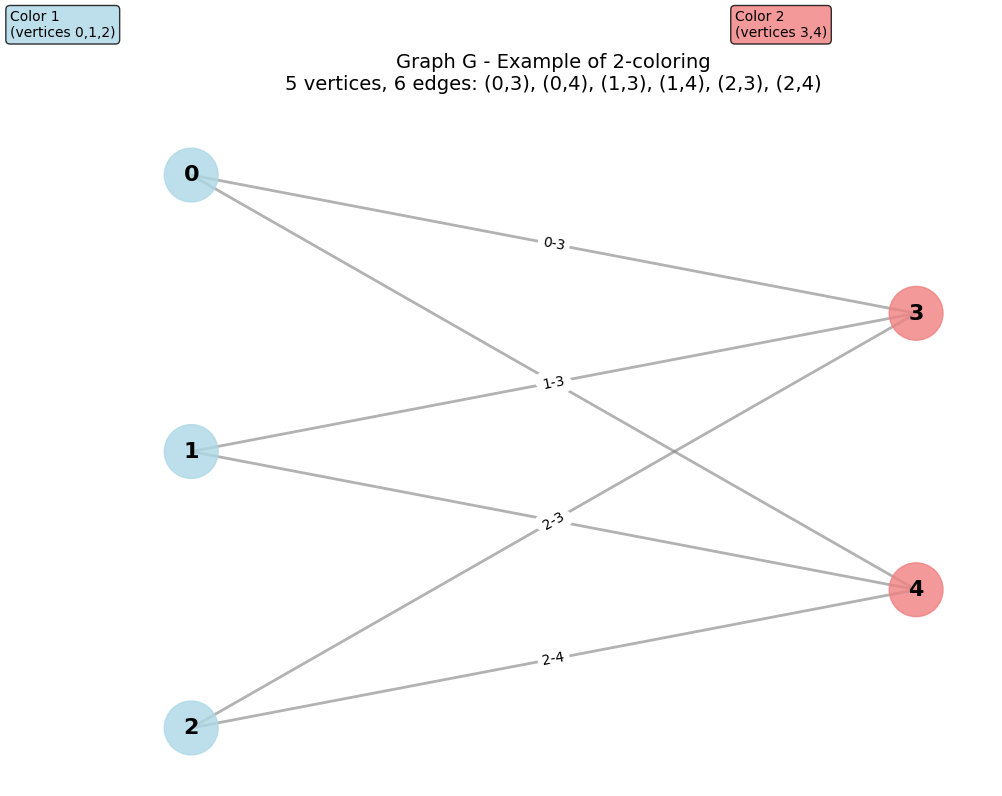

Graph G information:
Number of vertices: 5
Number of edges: 6
List of edges: [(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4)]
Degree of each vertex: {0: 2, 1: 2, 2: 2, 3: 3, 4: 3}

This graph is a complete bipartite graph K₃,₂
It is 2-colorable with partitions: {0,1,2} and {3,4}


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def design_graph():
    """
    Draws the graph G with 5 vertices and 6 edges.
    Graph G: vertices {0,1,2,3,4}, edges: (0,3), (0,4), (1,3), (1,4), (2,3), (2,4)
    """

    # Create the graph
    G = nx.Graph()

    # Add the vertices
    G.add_nodes_from([0, 1, 2, 3, 4])

    # Add the edges
    edges = [(0,3), (0,4), (1,3), (1,4), (2,3), (2,4)]
    G.add_edges_from(edges)

    # Figure configuration
    plt.figure(figsize=(10, 8))

    # Positions of vertices for a clear visualization
    # Place vertices 0,1,2 on one side and 3,4 on the other (bipartite graph)
    pos = {
        0: (-1, 1),     # left side
        1: (-1, 0),     # left side
        2: (-1, -1),    # left side
        3: (1, 0.5),    # right side
        4: (1, -0.5)    # right side
    }

    # Draw the graph
    nx.draw_networkx_nodes(G, pos,
                          node_color=['lightblue', 'lightblue', 'lightblue', 'lightcoral', 'lightcoral'],
                          node_size=1500,
                          alpha=0.8)

    nx.draw_networkx_edges(G, pos,
                          edge_color='gray',
                          width=2,
                          alpha=0.6)

    nx.draw_networkx_labels(G, pos,
                           font_size=16,
                           font_weight='bold')

    # Add edge labels
    edge_labels = {edge: f"{edge[0]}-{edge[1]}" for edge in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10)

    plt.title("Graph G - Example of 2-coloring\n5 vertices, 6 edges: (0,3), (0,4), (1,3), (1,4), (2,3), (2,4)",
              fontsize=14, pad=20)

    # Add legend for colors
    plt.text(-1.5, 1.5, "Color 1\n(vertices 0,1,2)",
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
             fontsize=10)

    plt.text(0.5, 1.5, "Color 2\n(vertices 3,4)",
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8),
             fontsize=10)

    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Display graph information
    print("Graph G information:")
    print(f"Number of vertices: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"List of edges: {list(G.edges())}")
    print(f"Degree of each vertex: {dict(G.degree())}")
    print("\nThis graph is a complete bipartite graph K₃,₂")
    print("It is 2-colorable with partitions: {0,1,2} and {3,4}")


# Main function
if __name__ == "__main__":
    design_graph()


In [10]:
def oracle2(qq):
    # YOUR CODE HERE
    # Compute verticle
    #  (0,3) -> qubit 5
    yield cirq.CX(qq[0], qq[5])
    yield cirq.CX(qq[3], qq[5])

    #  (0,4) -> qubit 6
    yield cirq.CX(qq[0], qq[6])
    yield cirq.CX(qq[4], qq[6])

    #  (1,3) -> qubit 7
    yield cirq.CX(qq[1], qq[7])
    yield cirq.CX(qq[3], qq[7])

    # (1,4) -> qubit 8
    yield cirq.CX(qq[1], qq[8])
    yield cirq.CX(qq[4], qq[8])

    #  (2,3) -> qubit 9
    yield cirq.CX(qq[2], qq[9])
    yield cirq.CX(qq[3], qq[9])

    #  (2,4) -> qubit 10
    yield cirq.CX(qq[2], qq[10])
    yield cirq.CX(qq[4], qq[10])

    # prepare ancilla
    controls = [qq[i] for i in range(5, 11)]
    yield cirq.X(qq[11]).controlled_by(*controls)

    # reverse calculation of verticle
    #  (2,4) -> qubit 10
    yield cirq.CX(qq[4], qq[10])
    yield cirq.CX(qq[2], qq[10])

    #  (2,3) -> qubit 9
    yield cirq.CX(qq[3], qq[9])
    yield cirq.CX(qq[2], qq[9])

    #  (1,4) -> qubit 8
    yield cirq.CX(qq[4], qq[8])
    yield cirq.CX(qq[1], qq[8])

    # (1,3) -> qubit 7
    yield cirq.CX(qq[3], qq[7])
    yield cirq.CX(qq[1], qq[7])

    # (0,4) -> qubit 6
    yield cirq.CX(qq[4], qq[6])
    yield cirq.CX(qq[0], qq[6])

    #  (0,3) -> qubit 5
    yield cirq.CX(qq[3], qq[5])
    yield cirq.CX(qq[0], qq[5])

In [11]:
# We need some code so you can check your solution
def oracle_computation2(qq):
    yield oracle2(qq)
    yield Z(qq[11])
    yield inverse(oracle2(qq))

In [12]:
def grover2(trials_number):
    import cirq
    from cirq import X, H, Z, inverse, CX
    s = cirq.Simulator()

    qq = cirq.LineQubit.range(12)
    n=5

    circuit = cirq.Circuit()
    circuit.append(H.on_each(*(qq[0:n])))
    for i in range(2):
        circuit.append(oracle_computation2(qq))
        circuit.append(grover_diffusion(qq,n))

    circuit.append(cirq.measure(*(qq[0:n]), key='result'))

    # determine the statistics of the measurements
    samples = s.run(circuit, repetitions=trials_number)
    result = samples.measurements["result"]

    def bitstring(bits):
        return "".join(str(int(b)) for b in bits)

    counts = samples.histogram(key="result",fold_func=bitstring)
    return counts

In [13]:
#You can use this cell to test your solution
shots=1000
grover2(shots)

Counter({'11100': 449,
         '00011': 457,
         '00000': 1,
         '00010': 6,
         '10010': 5,
         '01110': 3,
         '10101': 6,
         '01000': 5,
         '11111': 6,
         '01101': 2,
         '11110': 2,
         '10001': 4,
         '11001': 3,
         '11101': 2,
         '00111': 3,
         '00100': 4,
         '00001': 5,
         '10000': 3,
         '10111': 1,
         '11011': 2,
         '10100': 3,
         '01100': 3,
         '01001': 3,
         '10011': 2,
         '00110': 5,
         '01111': 2,
         '01011': 3,
         '00101': 1,
         '11000': 4,
         '01010': 2,
         '11010': 3})

In [ ]:
# hidden tests in this cell will be used for grading.

## Question 3 (10 points)

Graph $G$ has 4 vertices and 5 edges: (0,1), (0,2), (0,3), (1,2), (1,3)

Write an oracle for the graph $G$ to check whether there exists a coloring with at least 4 edges connecting vertices with different colors.

The function `oracle3` has

* input: `qq`, a 13-qubit register
* returns: `None`

The function should append only a sequence of gates to `qq`. It should not append any measurements to `qq`.

Use qubits
- 0-3 for the vertices,
- 4-8 for the edges,
- 9-11 for the addition (remember we need three qubits here for addition unlike the last question), and
- 12 as the ancilla.

You can test the oracle with the provided `grover_diffusion`, `grover` and `oracle_computation3` functions.

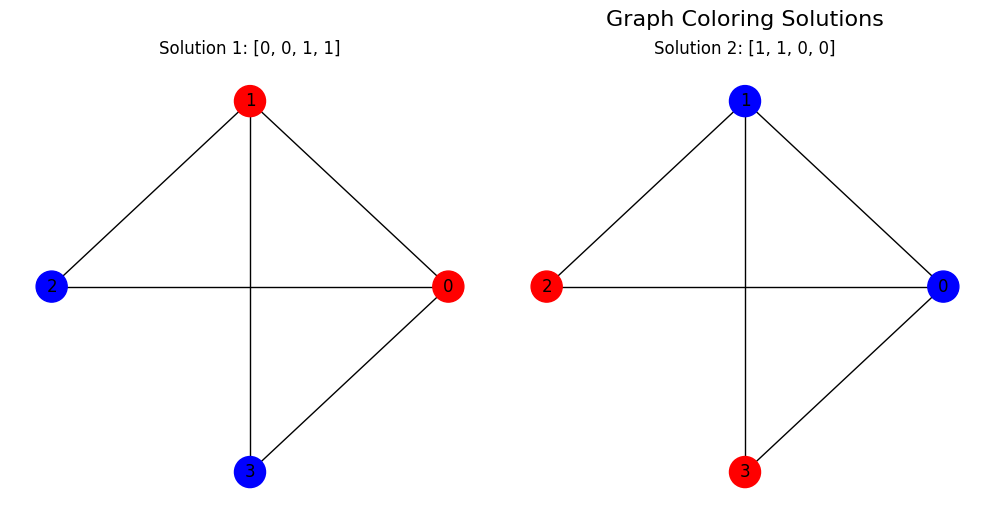

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph_colorings():
    # Create the graph
    G = nx.Graph()

    # Add the nodes
    G.add_nodes_from([0, 1, 2, 3])

    # Add the edges
    edges = [(0,1), (0,2), (0,3), (1,2), (1,3)]
    G.add_edges_from(edges)

    # Coloring solutions
    solutions = [
        [0, 0, 1, 1],
        [1, 1, 0, 0],
    ]

    # Configure the figure
    plt.figure(figsize=(15, 10))

    # Draw each solution
    for i, coloring in enumerate(solutions, 1):
        plt.subplot(2, 3, i)

        # Map the colors
        color_map = ['red' if c == 0 else 'blue' for c in coloring]

        # Graph layout
        pos = nx.circular_layout(G)

        # Draw the nodes
        nx.draw_networkx_nodes(G, pos,
                                node_color=color_map,
                                node_size=500)

        # Draw the edges
        nx.draw_networkx_edges(G, pos)

        # Add node labels
        nx.draw_networkx_labels(G, pos)

        # Title for each subgraph
        plt.title(f"Solution {i}: {coloring}")

        # Remove axes
        plt.axis('off')

    # Overall title
    plt.suptitle("Graph Coloring Solutions", fontsize=16)

    # Display the graph
    plt.tight_layout()
    plt.show()

# Run the function
draw_graph_colorings()


In [15]:
def oracle3(qq):
    # YOUR CODE HERE
    # 1. Encode edge differences (qubits 4-8)
    # Edge (0,1)
    yield CX(qq[0], qq[4])
    yield CX(qq[1], qq[4])
    # Edge (0,2)
    yield CX(qq[0], qq[5])
    yield CX(qq[2], qq[5])
    # Edge (0,3)
    yield CX(qq[0], qq[6])
    yield CX(qq[3], qq[6])
    # Edge (1,2)
    yield CX(qq[1], qq[7])
    yield CX(qq[2], qq[7])
    # Edge (1,3)
    yield CX(qq[1], qq[8])
    yield CX(qq[3], qq[8])


    yield CCX(qq[4], qq[5], qq[9])      # qq[9] = qq[4] & qq[5]
    yield CCX(qq[6], qq[7], qq[10])     # qq[10] = qq[6] & qq[7]
    yield CCX(qq[9], qq[10], qq[11])    # qq[11] = qq[4]&qq[5]&qq[6]&qq[7]
    yield CCX(qq[11], qq[8], qq[12])    # qq[12] = all 5 are 1


    yield CCX(qq[9], qq[10], qq[11])
    yield CCX(qq[6], qq[7], qq[10])
    yield CCX(qq[4], qq[5], qq[9])


    edge_indices = [4,5,6,7,8]
    from itertools import combinations
    for combo in combinations(edge_indices, 4):
        # Set ancilla for this combination
        controls = list(combo)
        # We'll use qq[9], qq[10], qq[11] as temporary ancillas for 4-controls
        # CCX(a,b,c): c = a & b
        yield CCX(qq[controls[0]], qq[controls[1]], qq[9])
        yield CCX(qq[controls[2]], qq[controls[3]], qq[10])
        yield CCX(qq[9], qq[10], qq[11])
        yield CX(qq[11], qq[12])
        # Uncompute
        yield CCX(qq[9], qq[10], qq[11])
        yield CCX(qq[controls[2]], qq[controls[3]], qq[10])
        yield CCX(qq[controls[0]], qq[controls[1]], qq[9])


    # Reverse of encoding
    yield CX(qq[1], qq[8])
    yield CX(qq[3], qq[8])
    yield CX(qq[1], qq[7])
    yield CX(qq[2], qq[7])
    yield CX(qq[0], qq[6])
    yield CX(qq[3], qq[6])
    yield CX(qq[0], qq[5])
    yield CX(qq[2], qq[5])
    yield CX(qq[0], qq[4])
    yield CX(qq[1], qq[4])


In [16]:
# We need some code so you can check your solution
def oracle_computation3(qq):
    yield oracle3(qq)
    yield Z(qq[12])
    yield inverse(oracle3(qq))

In [17]:
import cirq
from cirq import X, H, Z, inverse, CX, CCX

def grover3(trials_number):
    s = cirq.Simulator()

    qq = cirq.LineQubit.range(13)
    n=4

    circuit = cirq.Circuit()
    circuit.append(H.on_each(*(qq[0:n])))
    for i in range(2):
        circuit.append(oracle_computation3(qq))
        circuit.append(grover_diffusion(qq,n))

    circuit.append(cirq.measure(*(qq[0:n]), key='result'))

    # determine the statistics of the measurements
    samples = s.run(circuit, repetitions=trials_number)
    result = samples.measurements["result"]

    def bitstring(bits):
        return "".join(str(int(b)) for b in bits)

    counts = samples.histogram(key="result",fold_func=bitstring)
    return counts

In [18]:
#You can use this cell to test your solution
shots=1000
grover3(shots)

Counter({'1100': 484,
         '0011': 462,
         '0000': 3,
         '0010': 9,
         '0101': 4,
         '1001': 4,
         '0111': 4,
         '1010': 4,
         '0110': 5,
         '0001': 5,
         '0100': 2,
         '1101': 4,
         '1000': 3,
         '1110': 2,
         '1111': 2,
         '1011': 3})

In [ ]:
# hidden tests in this cell will be used for grading.